Attempts to reproduce results from 10.1016/j.idm.2021.12.008.

In [1]:
from copy import deepcopy
from matplotlib import colors as mcolors
from matplotlib import pyplot as plt
import numpy as np
import os
from tqdm.notebook import tqdm, trange

from sde_models import NinoTorres2022
import sde

store_ssr_data = True
load_ssr_data = False

fig_kwargs = dict(
    layout='compressed',
    figsize=(15.0, 3.0)
)
plot_all_kwargs = dict(
    color='gray',
    alpha=0.1
)
fig_compare_kwargs = dict(
    layout='compressed', 
    figsize=(8.0, 4.0)
)

t_fin = 200.0
dt = 1.0  # Not reported
sample_size = 20
tested_sample_sizes = [20, 50, 100, 500, 1000, 5000, 10000]
confidence = 0.95

results_dir = os.path.join('results', NinoTorres2022.name)

def initial_values(**kwargs):
    result = {'S': 7743955.0,
              'E': 0.0,
              'IA': 0.0,
              'IS': 1.0,
              'Q': 0.0,
              'H': 0.0,
              'R': 0.0,
              'C': 0.0,
              'D': 0.0}
    result.update(kwargs)
    result['N'] = sum(result.values())
    return result

In [2]:
num_steps = int(t_fin / dt)

if sde.get_pool() is None:
    sde.start_pool()

Generating results. Corrections were necessary to reproduce. 

In [3]:
initial_values_fig = initial_values()
parameters_fig = deepcopy(NinoTorres2022.parameter_defaults)
# Corrections to reproduce results
parameters_fig['eps'] *= 0.77
parameters_fig['kappa'] *= 1.5
parameters_fig['p'] *= 1.05

result_fig = sde.execute_sample(sample_size, NinoTorres2022(), num_steps, dt, 
                                initial_values=initial_values_fig, parameters=parameters_fig)

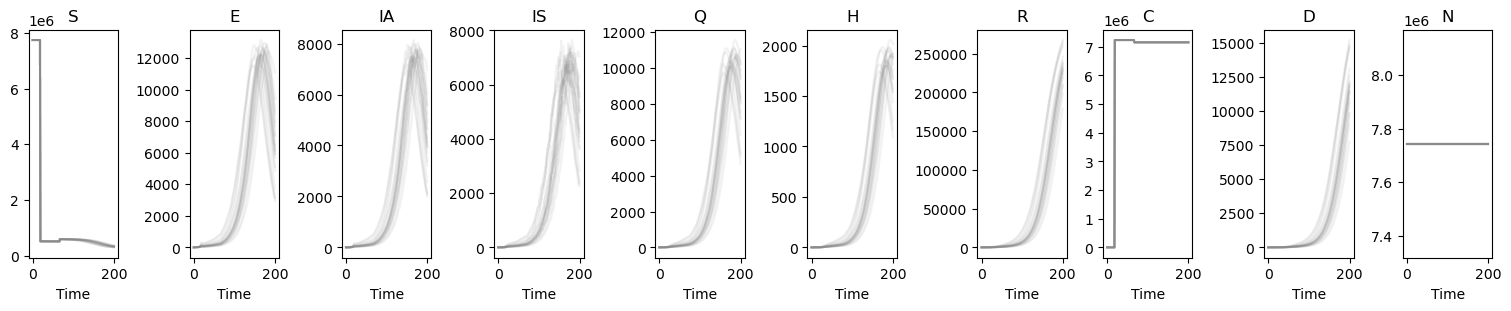

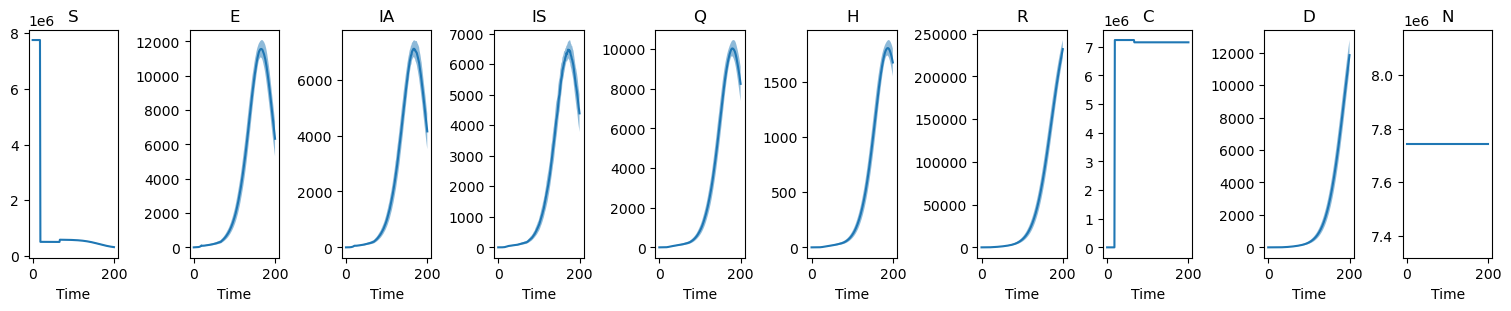

In [4]:
result_fig.plot(fig_kwargs=fig_kwargs, plot_all_kwargs=plot_all_kwargs)

fig, axs = result_fig.plot_ci(0.95, fig_kwargs=fig_kwargs, plot_all_kwargs=dict(alpha=0.5))
_ = result_fig.plot_mean(fig_axs=(fig, axs))

Attempting to reproduced Figure 5.

Results were reproduced with corrections. 

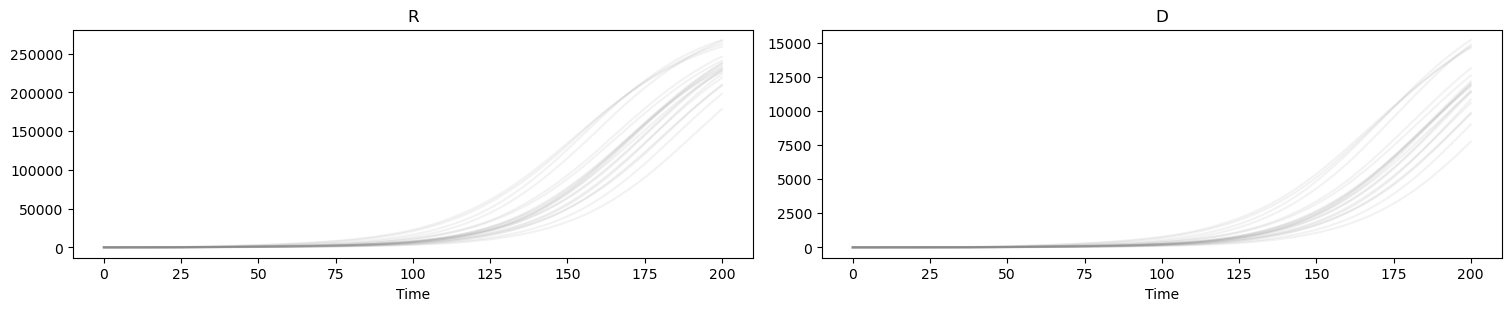

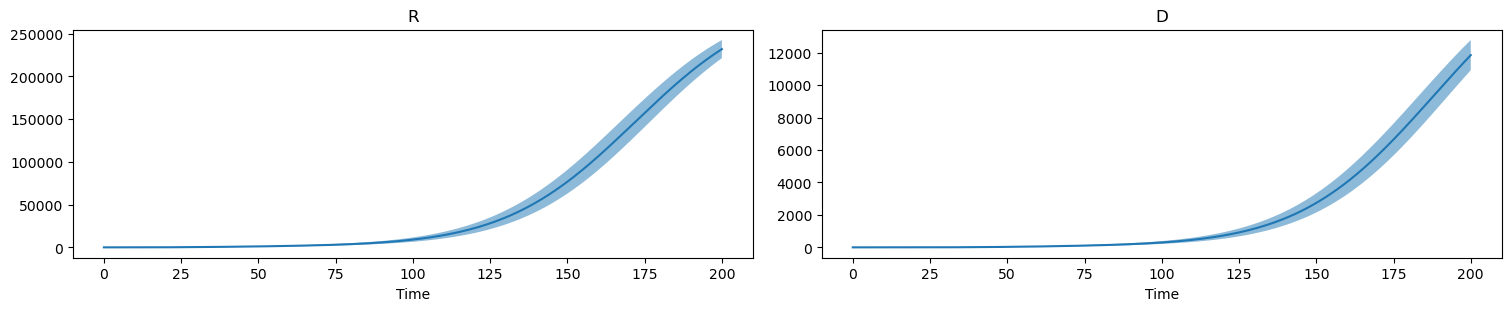

In [5]:
result_fig_5_extract = result_fig.extract('R', 'D')

fig, axs = result_fig_5_extract.plot(fig_kwargs=fig_kwargs, plot_all_kwargs=plot_all_kwargs)
fig, axs = result_fig_5_extract.plot_ci(0.95, fig_kwargs=fig_kwargs, plot_all_kwargs=dict(alpha=0.5))
_ = result_fig_5_extract.plot_mean(fig_axs=(fig, axs))

Attempting to reproduced Figure 6.

Results were reproduced with corrections. 

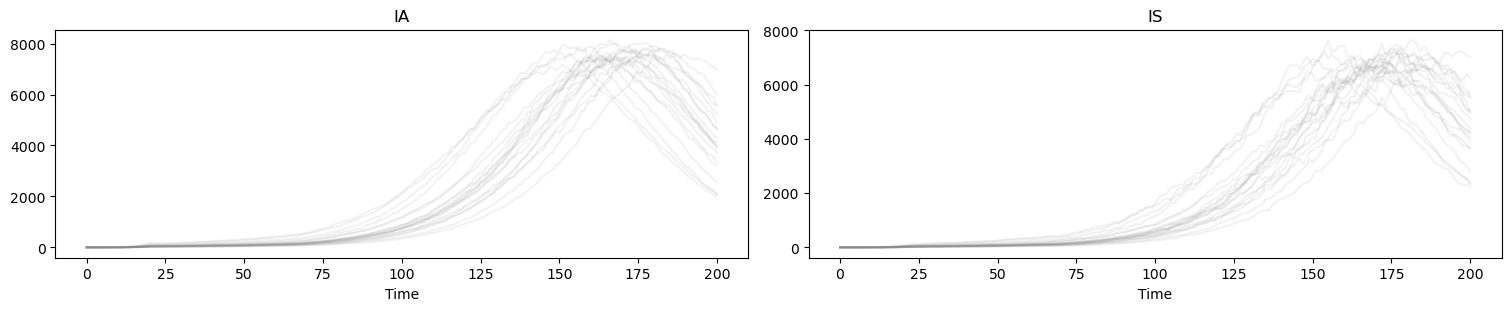

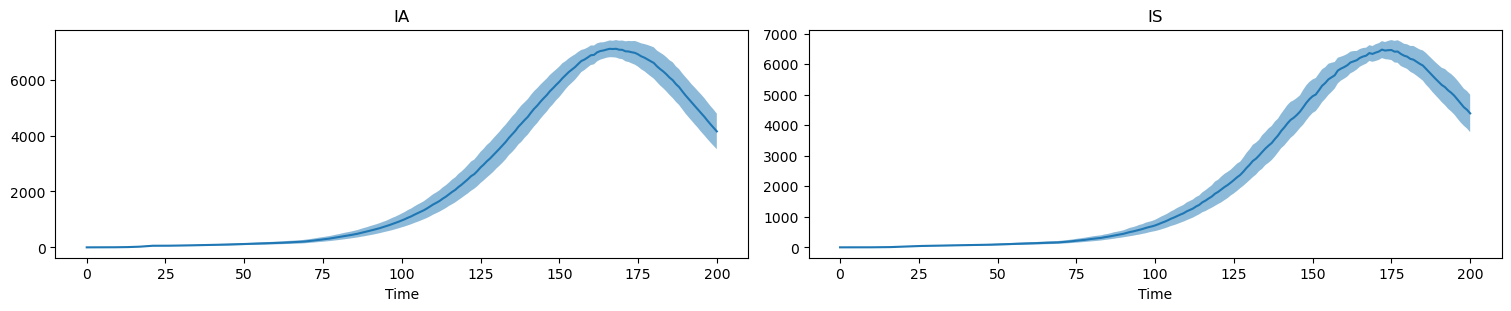

In [6]:
result_fig_6_extract = result_fig.extract('IA', 'IS')

fig, axs = result_fig_6_extract.plot(fig_kwargs=fig_kwargs, plot_all_kwargs=plot_all_kwargs)
fig, axs = result_fig_6_extract.plot_ci(0.95, fig_kwargs=fig_kwargs, plot_all_kwargs=dict(alpha=0.5))
_ = result_fig_6_extract.plot_mean(fig_axs=(fig, axs))

Attempting to reproduced Figure 7.

Results were reproduced with corrections. 

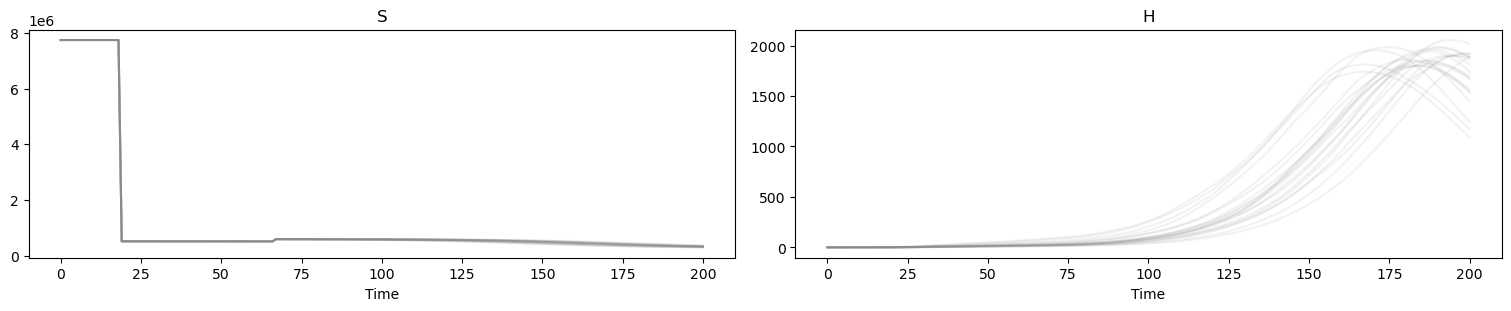

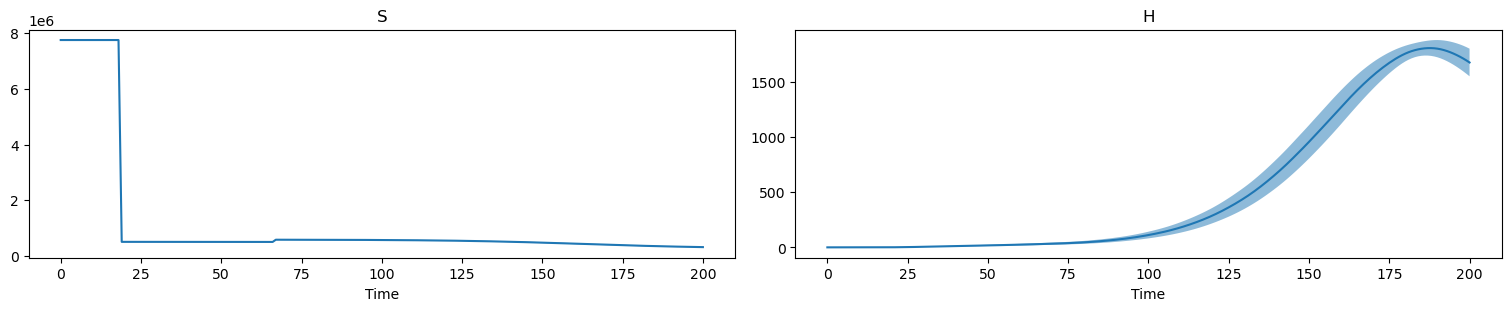

In [7]:
result_fig_7_extract = result_fig.extract('S', 'H')

fig, axs = result_fig_7_extract.plot(fig_kwargs=fig_kwargs, plot_all_kwargs=plot_all_kwargs)
fig, axs = result_fig_7_extract.plot_ci(0.95, fig_kwargs=fig_kwargs, plot_all_kwargs=dict(alpha=0.5))
_ = result_fig_7_extract.plot_mean(fig_axs=(fig, axs))

Quantify reproducibility.

EFECT Error (mean +- st. dev)
Sample size 20: 1.0170396787448126 +- 0.058851430933624466
Sample size 50: 0.6479310440809488 +- 0.03667088388501321
Sample size 100: 0.4652935046373568 +- 0.029523786110717532
Sample size 500: 0.2075458097651151 +- 0.012861527156667614
Sample size 1000: 0.14717965435126457 +- 0.00931637816098229
Sample size 5000: 0.06578876160065579 +- 0.0040960906981356
Sample size 10000: 0.04647559658279411 +- 0.002844652220861191


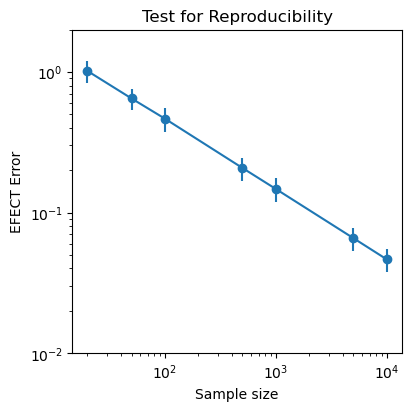

In [8]:
results_prefix = 'results'

ssr_metadata = {}
ssr_results = {}

if load_ssr_data:
    md_set, res_set = sde.load_ssr_dataset(results_dir, results_prefix)[:2]
    for i in range(len(md_set)):
        sz = md_set[i].sample_size
        ssr_metadata[sz] = md_set[i]
        ssr_results[sz] = res_set[i]
    
    tested_sample_sizes = list(ssr_metadata.keys())
    tested_sample_sizes.sort()

else:
    ssr_metadata, ssr_results = sde.generate_ssr_dataset(
        NinoTorres2022(),
        tested_sample_sizes,
        num_steps,
        dt,
        initial_values_fig,
        parameters_fig,
        results_prefix,
        results_dir if store_ssr_data else None
    )

fig_ax = sde.plot_repro(ssr_metadata)
fig_ax[1].set_title('Test for Reproducibility')

print('EFECT Error (mean +- st. dev)')
for sz, md in ssr_metadata.items():
    print(f'Sample size {sz}: {md.ks_stat_mean} +- {md.ks_stat_stdev}')

Show reproducible results.

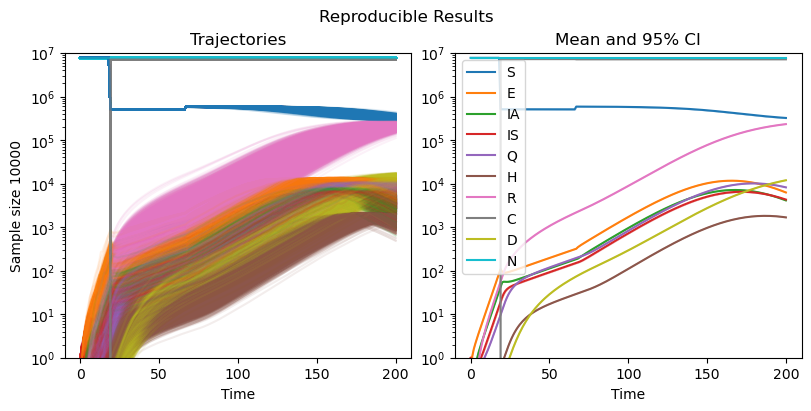

In [9]:
fig, axs = plt.subplots(1, 2, **fig_compare_kwargs)

plot_colors = {
    NinoTorres2022.variable_names[i]: c for i, c in enumerate(mcolors.TABLEAU_COLORS.values())
}

ssr_results_sz = max(ssr_results.keys())

r: sde.SDEResultSample = ssr_results[ssr_results_sz]
r.plot(fig_axs=(fig, [axs[0]] * len(NinoTorres2022().variable_names)),
       plot_all_kwargs=dict(alpha=0.1),
       plot_kwargs={n: dict(color=plot_colors[n]) 
                    for n in NinoTorres2022().variable_names})

r.plot_ci(confidence, fig_axs=(fig, [axs[1]] * len(NinoTorres2022().variable_names)),
          plot_all_kwargs=dict(alpha=0.25),
          plot_kwargs={n: dict(color=plot_colors[n]) 
                       for n in NinoTorres2022().variable_names})
r.plot_mean(fig_axs=(fig, [axs[1]] * len(NinoTorres2022().variable_names)),
            plot_kwargs={n: dict(color=plot_colors[n], label=n) 
                         for n in NinoTorres2022().variable_names})

fig.suptitle('Reproducible Results')
axs[0].set_title('Trajectories')
axs[1].set_title(f'Mean and {int(confidence * 100)}% CI')
axs[0].set_ylabel(f'Sample size {ssr_results_sz}')
axs[0].set_yscale('log')
axs[1].set_yscale('log')
axs[0].set_ylim(1E0, 1E7)
axs[1].set_ylim(1E0, 1E7)
_ = axs[1].legend()

Test precision of published sample reproducibility over bounds of fitted parameters. Parameter differences are measured as a fraction of the reported value and tested over the bounds with which parameter fitting was performed. 

Note that parameter $\xi$ was reported to have value 0.2 but was fitted in the bounds [0.5, 1.0]. Bounds for xi were assumed here to be [0.1, 1.0].

For the reported sample size of 20, 
* beta, omega, and xi: differences >= 5% are reliably detectable
* nu: differences > 5% are reliably detectable
* alpR: no differences are reliably detectable
* alpD: differences > 60% are reliably detectable
* chi: differences > 25% are reliably detectable

For parameters that do not admit detectable differences for a sample size of 20,
* alpR: differences > 50% are reliably detectable for a sample size of 5,000, and > 30% of a sample size of 10,000
* alpD, chi, and nu: differences >= 5% are reliably detectable for sample sizes of 50 or greater

In [10]:
num_eval_pts = 21
bounds_fitted = {
    'beta': (0.0, 1.4),
    'omega': (1./10., 1./2.1),
    'xi': (0.1, 1.),
    'alpR': (1./12., 1./9.5),
    'alpD': (1./14., 1./7.6),
    'nu': (0., 1.),
    'chi': (0., 1.)
}

vals_precision_fitted = {}
for name, name_bounds in bounds_fitted.items():
    name_vals = np.linspace(*name_bounds, num_eval_pts)
    val_ratios = [x / parameters_fig[name] for x in name_vals]
    if 1.0 not in val_ratios:
        val_ratios.append(1.0)
        val_ratios.sort()
    vals_precision_fitted[name] = val_ratios

md_precision_fitted = {name: {} for name in bounds_fitted.keys()}
pvals_precision_fitted = {name: {} for name in bounds_fitted.keys()}

for sz in tqdm(tested_sample_sizes, leave=False):
    for name, name_bounds in tqdm(bounds_fitted.items(), desc=f'Size {sz}', leave=False):
        err, pval = sde.test_precision_params(
            ssr_results[sz],
            NinoTorres2022(),
            name,
            vals_precision_fitted[name],
            (ssr_metadata[sz].ks_stat_mean, ssr_metadata[sz].ks_stat_stdev, ssr_metadata[sz].ks_stat_sz),
            parameters_fig
        )
        md_precision_fitted[name][sz], pvals_precision_fitted[name][sz] = err, pval

  0%|          | 0/7 [00:00<?, ?it/s]

Size 20:   0%|          | 0/7 [00:00<?, ?it/s]

Size 50:   0%|          | 0/7 [00:00<?, ?it/s]

Size 100:   0%|          | 0/7 [00:00<?, ?it/s]

Size 500:   0%|          | 0/7 [00:00<?, ?it/s]

Size 1000:   0%|          | 0/7 [00:00<?, ?it/s]

Size 5000:   0%|          | 0/7 [00:00<?, ?it/s]

Size 10000:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

beta:   0%|          | 0/22 [00:00<?, ?it/s]

omega:   0%|          | 0/22 [00:00<?, ?it/s]

xi:   0%|          | 0/22 [00:00<?, ?it/s]

alpR:   0%|          | 0/22 [00:00<?, ?it/s]

alpD:   0%|          | 0/22 [00:00<?, ?it/s]

nu:   0%|          | 0/22 [00:00<?, ?it/s]

chi:   0%|          | 0/21 [00:00<?, ?it/s]

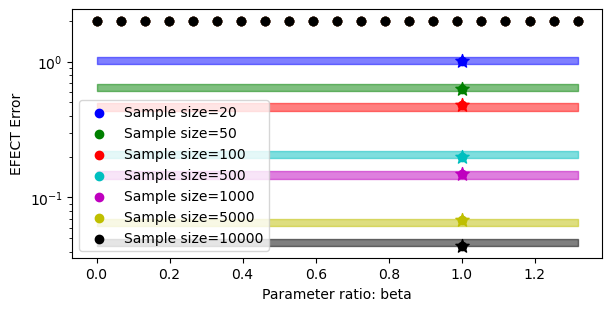

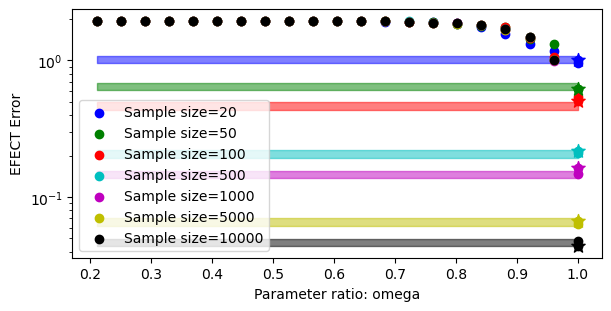

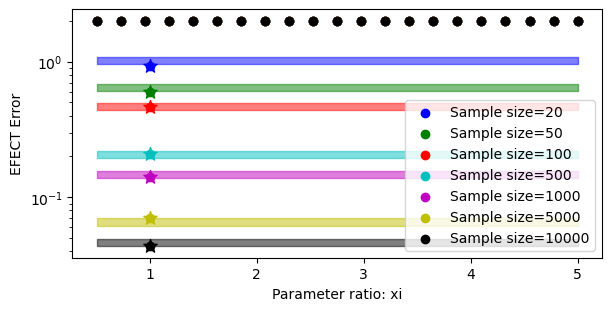

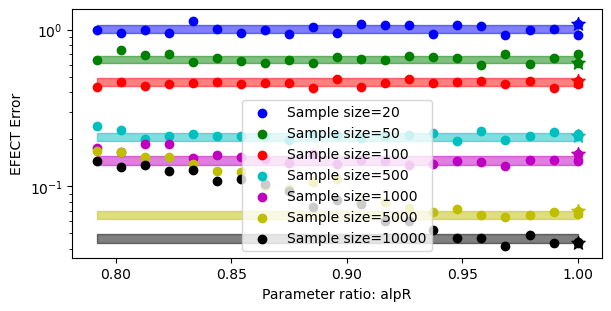

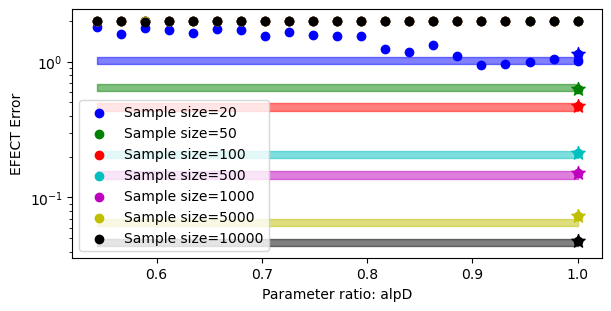

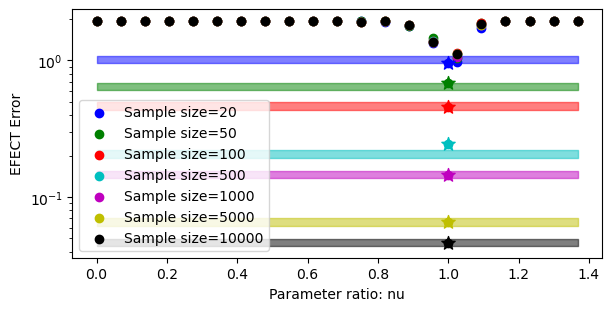

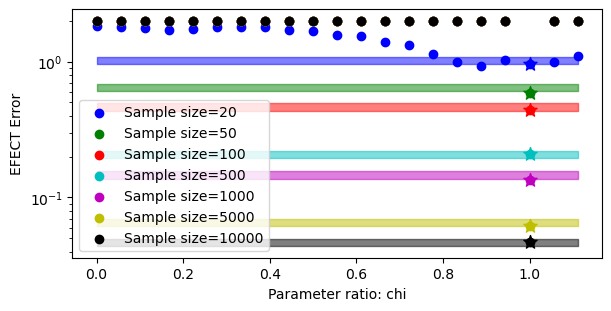

In [11]:
err_stats = {name: {k: (v.ks_stat_mean, v.ks_stat_stdev) for k, v in ssr_metadata.items()} 
             for name in bounds_fitted.keys()}
repro_colors = list(mcolors.BASE_COLORS.values())

for i, name in tqdm(enumerate(md_precision_fitted.keys()), total=len(md_precision_fitted.keys()), leave=False):
    fig, axs = plt.subplots(1, 1, layout='compressed', figsize=(6.0, 3.0))

    data = md_precision_fitted[name]
    name_color = repro_colors[i % len(repro_colors)]
    sde.plot_precision(
        err_stats[name],
        vals_precision_fitted[name],
        data,
        fig_axs=(fig, [axs] * len(data.keys())),
        scatter_plot_kwargs={sz: dict(label=f'Sample size={sz}',
                                      color=repro_colors[j % len(repro_colors)]) 
                             for j, sz in enumerate(data.keys())},
        fill_plot_kwargs={sz: dict(color=repro_colors[j % len(repro_colors)]) 
                          for j, sz in enumerate(data.keys())}
    )
    axs.set_xlabel(f'Parameter ratio: {name}')
    axs.set_ylabel(f'EFECT Error')
    axs.legend()

    for i in trange(len(vals_precision_fitted[name]), desc=name, leave=False):
        if vals_precision_fitted[name][i] == 1.0:
            for j, sz in enumerate(tested_sample_sizes):
                axs.scatter([vals_precision_fitted[name][i]], 
                            [md_precision_fitted[name][sz][i]], 
                            s=100, 
                            color=repro_colors[j % len(repro_colors)],
                            marker='*')

  0%|          | 0/7 [00:00<?, ?it/s]

beta:   0%|          | 0/22 [00:00<?, ?it/s]

omega:   0%|          | 0/22 [00:00<?, ?it/s]

xi:   0%|          | 0/22 [00:00<?, ?it/s]

alpR:   0%|          | 0/22 [00:00<?, ?it/s]

alpD:   0%|          | 0/22 [00:00<?, ?it/s]

nu:   0%|          | 0/22 [00:00<?, ?it/s]

chi:   0%|          | 0/21 [00:00<?, ?it/s]

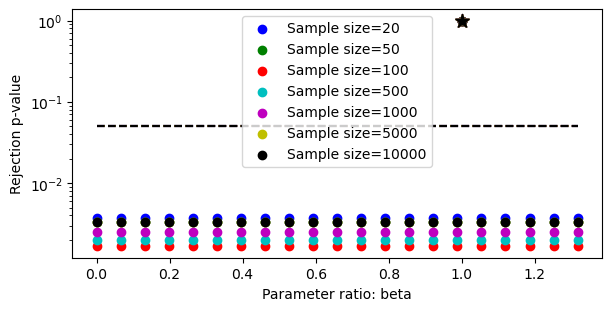

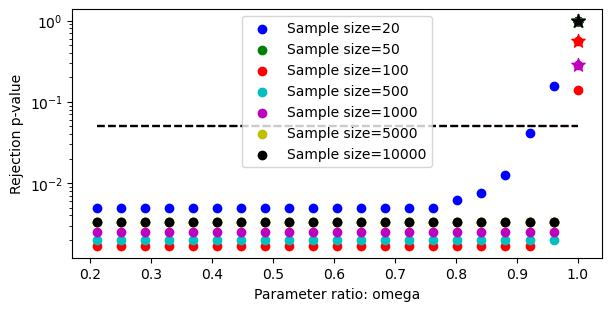

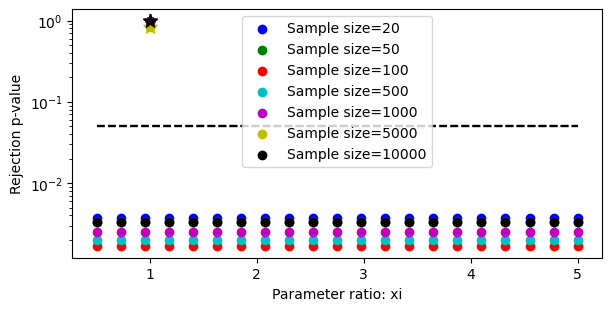

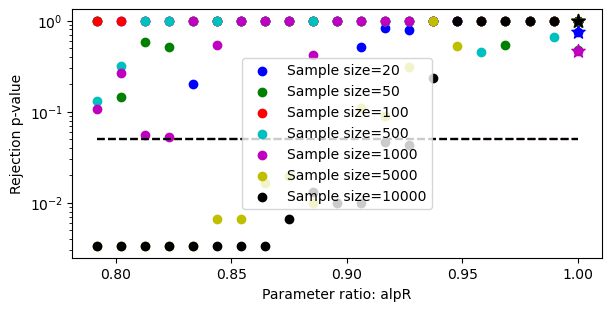

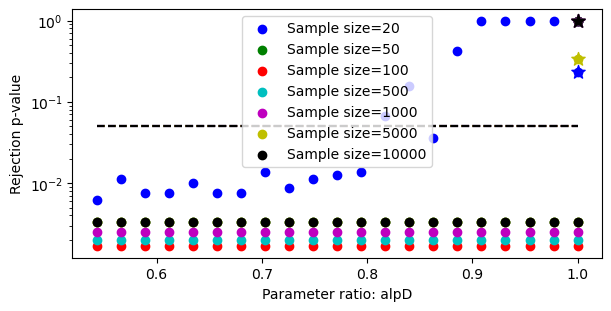

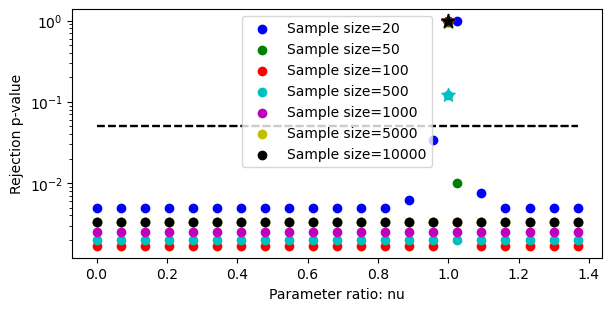

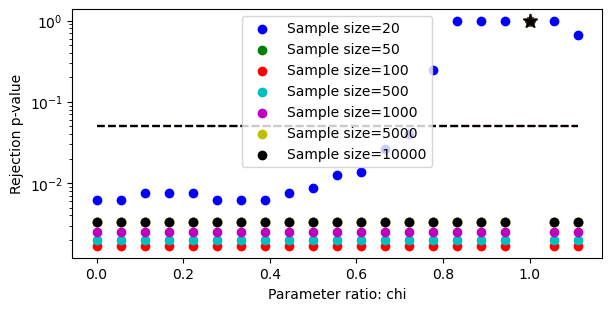

In [12]:
for i, name in tqdm(enumerate(md_precision_fitted.keys()), total=len(md_precision_fitted.keys()), leave=False):
    data = md_precision_fitted[name]

    fig, axs = plt.subplots(1, 1, layout='compressed', figsize=(6.0, 3.0))

    sde.plot_precision_test(
        pvals_precision_fitted[name],
        vals_precision_fitted[name],
        0.05,
        fig_axs=(fig, [axs] * len(data.keys())),
        plot_kwargs={sz: dict(color=repro_colors[j % len(repro_colors)]) 
                              for j, sz in enumerate(data.keys())},
        scatter_kwargs={sz: dict(label=f'Sample size={sz}', 
                                 color=repro_colors[j % len(repro_colors)]) 
                        for j, sz in enumerate(data.keys())}
    )
    axs.set_xlabel(f'Parameter ratio: {name}')
    axs.set_ylabel(f'Rejection p-value')
    axs.legend()

    for i in trange(len(vals_precision_fitted[name]), desc=name, leave=False):
        if vals_precision_fitted[name][i] == 1.0:
            for j, sz in enumerate(tested_sample_sizes):
                axs.scatter([vals_precision_fitted[name][i]], 
                            [pvals_precision_fitted[name][sz][i]], 
                            s=100, 
                            color=repro_colors[j % len(repro_colors)],
                            marker='*')